In [40]:
#!pip install --upgrade ../../tradeframework
#!pip install --upgrade ~/Development/repos/quantutils

#import tradeframework
from tradeframework.api import Derivative, Portfolio, Optimizer, Model, TradeEnvironment, TradeEngine, AssetInfo
from tradeframework.environments import SandboxEnvironment, SandboxContext, ZiplineEnvironment
from tradeframework.models import PreOpenMomentum




In [41]:
import pandas as pd
import numpy as np

import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# STRATEGY SET UP
txCost = 0
ts = pd.read_csv('data/WallSt-hourly-all.txt', index_col=0, parse_dates=[[0, 1]], dayfirst=True )
#ts = ts["2016-07-06":]

import pytz
# PreOpenMomentum model relies on timeseries being in local time zone
ts.index = ts.index.tz_localize("Europe/London").tz_convert("US/Eastern")

# Resample into hourly data
#order = ts.columns
#ts = ts.resample('5min').agg({'Open': 'first', 'High': 'max', 'Low': 'min','Close': 'last'})[order]


# Remove hours we are not interested in
#ts[(ts.index.hour > 19) | (ts.index.hour < 12)] = np.nan

# Resample into Business Days
#ts = ts.resample('5min').agg({'Open': 'first', 'High': 'max', 'Low': 'min','Close': 'last'})[order]
#

In [43]:
bEnv = SandboxEnvironment("TradeFair")
p = bEnv.createPortfolio("Baseline", optimizer=bEnv.createOptimizer("EqualWeightsOptimizer", "EqualWeights"))
#p.addModel(bEnv.createModel( "BuyAndHold", "D3-BuyAndHold", args=("15:00", "16:00")))
p.addModel(bEnv.createModel( "BuyAndHold", "D3-BuyAndHold"))
baseline = bEnv.handleData({}, AssetInfo("DOW", ts)).assets[0]

In [127]:
env = SandboxEnvironment("TradeFair")
context = {}

#opt = env.createOptimizer("KellyOptimizer", "KellyOpt", opts={"window":20*24, "weight":.01})
opt = env.createOptimizer("EqualWeightsOptimizer", "EqualWeights")
p = env.createPortfolio("MyPortfolio", optimizer=opt)

#p.addModel(env.createModel( "PreOpenMomentum", "D1-PreOpenMomentum" ))
p.addModel(env.createModel( "BuyAndHold", "D2-BuyAndHold" ))

#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold5", args=("11:00", "12:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold4", args=("12:00", "13:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold3", args=("13:00", "14:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold2", args=("14:00", "15:00")))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold1", args=("15:00", "16:00")))

#p.addModel(env.createModel( "SellAndHold", "D4-SellAndHold", args=("15:00", "16:00")))
threshold = 0
#p.addModel(env.createModel( "MarketInsightsV2Model", "D3-FinalHourML1", args=('cred/MIOapi_cred.json', 'cred/functions_cred.json', '265e2f7f3e06af1c6fc9e74434514c86', 'd2c3feaf6aad96c984f1b65ad4718aa4', threshold)))
#p.addModel(env.createModel( "MarketInsightsV2Model", "D3-FinalHourML2", args=('cred/MIOapi_cred.json', 'cred/functions_cred.json', '265e2f7f3e06af1c6fc9e74434514c86', '5404d26bccc568c4bddfc45f37d8fbfb', threshold)))
#p.addModel(env.createModel( "MarketInsightsV2Model", "D3-FinalHourML3", args=('cred/MIOapi_cred.json', 'cred/functions_cred.json', '265e2f7f3e06af1c6fc9e74434514c86', '9c92fb9e92ce3c502995b77eca6d617f', threshold)))
#p.addModel(env.createModel( "MarketInsightsV2Model", "D3-FinalHourML4", args=('cred/MIOapi_cred.json', 'cred/functions_cred.json', '265e2f7f3e06af1c6fc9e74434514c86', 'b765be85d6b48ee7db41548fb4424f9e', threshold)))

# Feed data into the portfolio

#for index in range(0, len(ts)):
#env.handleData(0, ts[:index+1])
dInfo = env.handleData(context, AssetInfo("DOW", ts)) # TODO this should be "getDerivative" or "backTest"


Derivative name : MyPortfolio
Number of assets : 1
Baseline name : Baseline


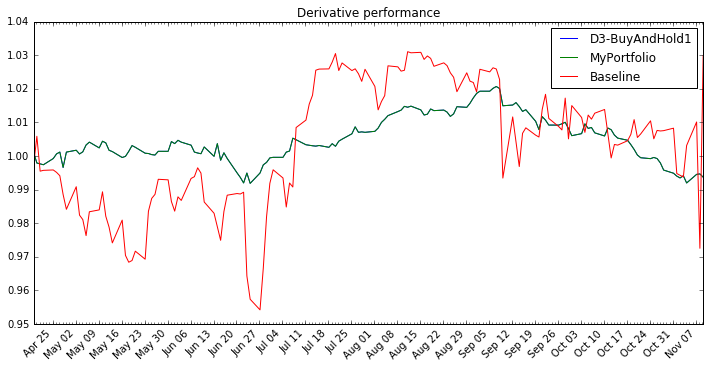

TradeFair_Portfolio                             DOW  \
                                      Capital                      Allocation   
                                         Open             Close           bar   
Date_Time                                                                       
2016-04-19 15:00:00-04:00    10000.0000000000  10010.5356548741  0.5545081513   
2016-04-20 15:00:00-04:00    10010.5356548741   9978.8942500982  0.5512439856   
2016-04-21 15:00:00-04:00     9978.8942500982   9976.4539344816  0.5546171856   
2016-04-22 15:00:00-04:00     9976.4539344816   9973.7394943220  0.5539673795   
2016-04-25 15:00:00-04:00     9973.7394943220   9992.1940446573  0.5558599499   
...                                       ...               ...           ...   
2016-11-03 15:00:00-04:00     9934.4486390285   9940.9793265423  0.5534480944   
2016-11-04 15:00:00-04:00     9940.9793265423   9919.4657661997  0.5530478237   
2016-11-07 15:00:00-05:00     9919.4657661997   9945.1168808752  0.5446096534   
2016-11-08 15:00:00-05:00     9945.1168808752   9946.4731244153  0.5424974161   
2016-11-09 15:00:00-05:00     9946.4731244153   9936.6866047355  0.5347824962   

                                                            
                                       Trade                
                           gap           bar           gap  
Date_Time                                                   
2016-04-19 15:00:00-04:00  0.0  0.5545081513 -0.5545081513  
2016-04-20 15:00:00-04:00  0.0  0.5512439856 -0.5512439856  
2016-04-21 15:00:00-04:00  0.0  0.5546171856 -0.5546171856  
2016-04-22 15:00:00-04:00  0.0  0.5539673795 -0.5539673795  
2016-04-25 15:00:00-04:00  0.0  0.5558599499 -0.5558599499  
...                        ...           ...           ...  
2016-11-03 15:00:00-04:00  0.0  0.5534480944 -0.5534480944  
2016-11-04 15:00:00-04:00  0.0  0.5530478237 -0.5530478237  
2016-11-07 15:00:00-05:00  0.0  0.5446096534 -0.5446096534  
2016-11-08 15:00:00-05:00  0.0  0.5424974161 -0.5424974161  
2016-11-09 15:00:00-05:00  0.0  0.5347824962 -0.5347824962  

[144 rows x 6 columns]

Merton measure of Market Timing : nan% predictability
p1 + p2 : 1.0
p-value : nan

Entire data start date: 2016-04-19
Entire data end date: 2016-11-09
Backtest months: 164


,Backtest
Annual return,-0.0%
Cumulative returns,-0.6%
Annual volatility,0.5%
Sharpe ratio,-0.08
Calmar ratio,-0.02
...,...
Kurtosis,85.94
Tail ratio,NaN
Daily value at risk,-0.1%
Alpha,0.00


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,2.81,2016-09-08,2016-11-04,NaT,NaN
1,1.28,2016-06-03,2016-06-24,2016-07-07,25
2,0.48,2016-05-11,2016-05-16,2016-06-02,17
3,0.46,2016-04-28,2016-04-28,2016-05-02,3
4,0.37,2016-04-20,2016-04-22,2016-04-27,6


ValueError: Found input variables with inconsistent numbers of samples: [127, 3055]

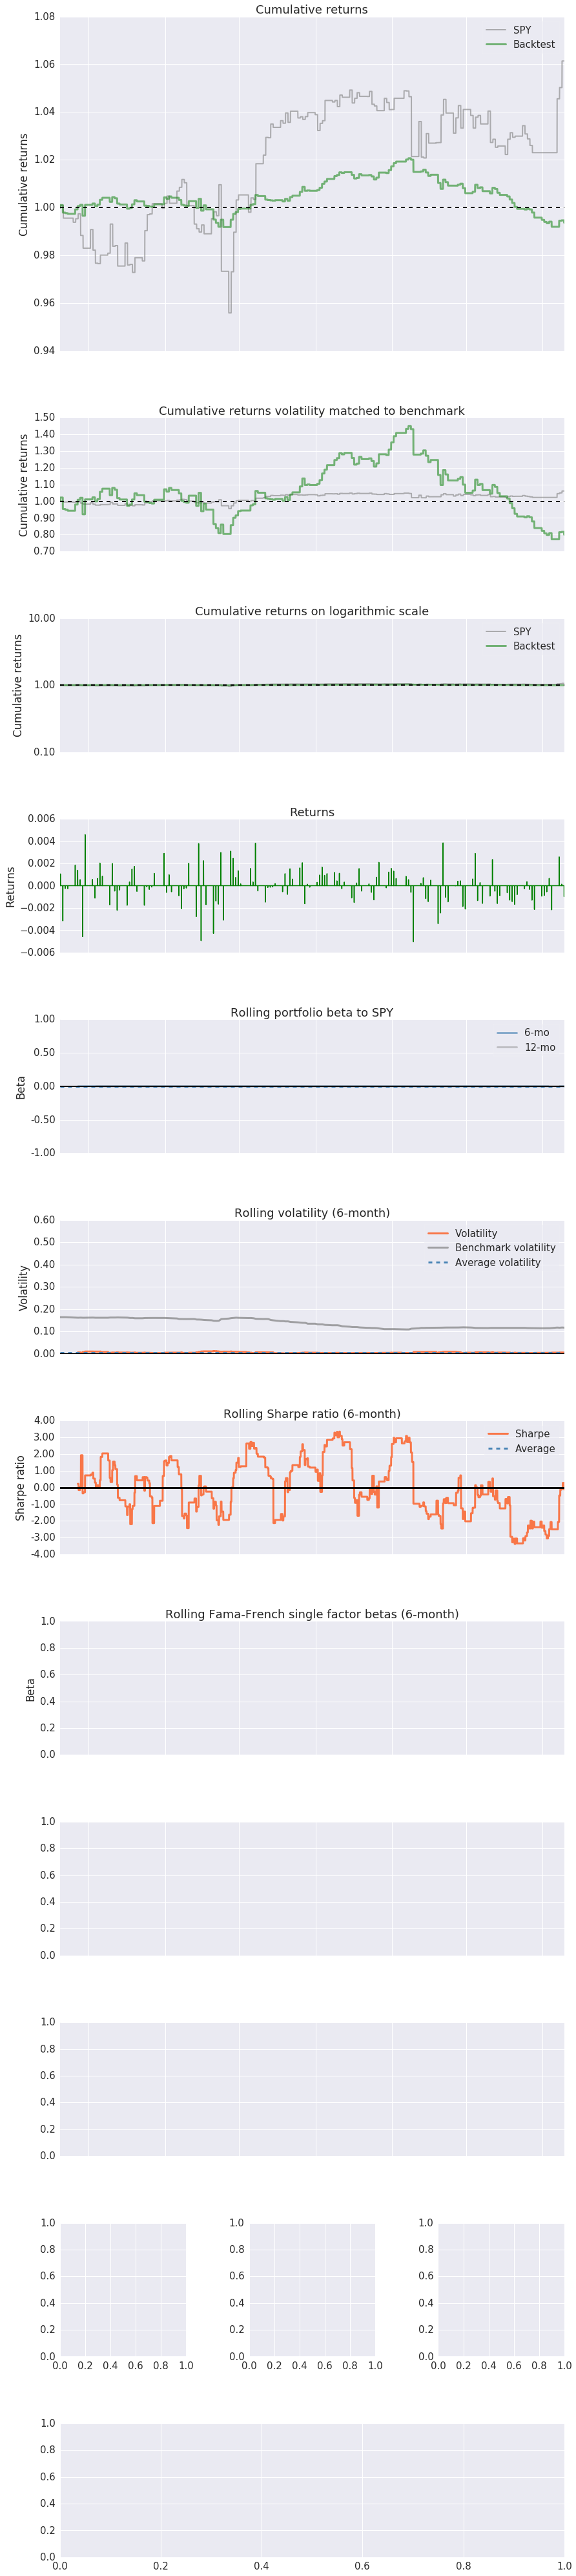

In [70]:
import tradeframework.utils.trader as trader
tInfo = env.getTradingInfo(context, dInfo, 10000)
trader.displaySummary(dInfo.assets[0], tInfo, baseline)

Derivative name : MyPortfolio
Number of assets : 5
Baseline name : Baseline


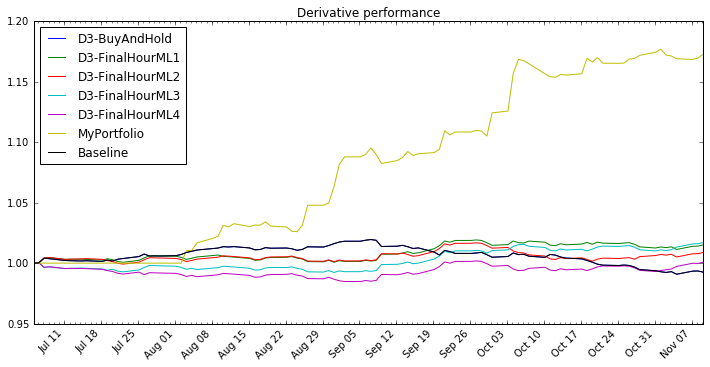

TradeFair_Portfolio                             DOW  \
                                      Capital                      Allocation   
                                         Open             Close           bar   
Date_Time                                                                       
2016-08-03 15:00:00-04:00    10000.0000000000  10103.3049928336  3.3870489454   
2016-08-04 15:00:00-04:00    10103.3049928336  10104.5067175134  0.0706896870   
2016-08-05 15:00:00-04:00    10104.5067175134  10167.8344364521  3.1663859469   
2016-08-08 15:00:00-04:00    10167.8344364521  10204.6446408014  1.6731911068   
2016-08-09 15:00:00-04:00    10204.6446408014  10222.4633669534  2.2273407690   
...                                       ...               ...           ...   
2016-11-03 15:00:00-04:00    11720.7199208626  11712.0433954583 -0.7352987631   
2016-11-04 15:00:00-04:00    11712.0433954583  11689.9239115308  0.5686242655   
2016-11-07 15:00:00-05:00    11689.9239115308  11684.1606077245 -0.1223631381   
2016-11-08 15:00:00-05:00    11684.1606077245  11695.4039744993  4.4973467099   
2016-11-09 15:00:00-05:00    11695.4039744993  11728.1187900458 -1.7876948386   

                                                            
                                       Trade                
                           gap           bar           gap  
Date_Time                                                   
2016-08-03 15:00:00-04:00  0.0  3.3870489454 -3.3870489454  
2016-08-04 15:00:00-04:00  0.0  0.0706896870 -0.0706896870  
2016-08-05 15:00:00-04:00  0.0  3.1663859469 -3.1663859469  
2016-08-08 15:00:00-04:00  0.0  1.6731911068 -1.6731911068  
2016-08-09 15:00:00-04:00  0.0  2.2273407690 -2.2273407690  
...                        ...           ...           ...  
2016-11-03 15:00:00-04:00  0.0 -0.7352987631  0.7352987631  
2016-11-04 15:00:00-04:00  0.0  0.5686242655 -0.5686242655  
2016-11-07 15:00:00-05:00  0.0 -0.1223631381  0.1223631381  
2016-11-08 15:00:00-05:00  0.0  4.4973467099 -4.4973467099  
2016-11-09 15:00:00-05:00  0.0 -1.7876948386  1.7876948386  

[70 rows x 6 columns]

Merton measure of Market Timing : 99.84% predictability
p1 + p2 : 1.2549342105263157
p-value : 0.0015694936137829055

Entire data start date: 2016-07-05
Entire data end date: 2016-11-09
Backtest months: 102


,Backtest
Annual return,1.9%
Cumulative returns,17.3%
Annual volatility,1.8%
Sharpe ratio,1.03
Calmar ratio,1.48
...,...
Kurtosis,239.34
Tail ratio,NaN
Daily value at risk,-0.2%
Alpha,0.00


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,1.27,2016-10-06,2016-10-12,2016-10-18,9
1,1.18,2016-09-08,2016-09-09,2016-09-21,10
2,0.80,2016-08-19,2016-08-24,2016-08-26,6
3,0.72,2016-11-02,2016-11-07,NaT,NaN
4,0.43,2016-09-28,2016-09-29,2016-09-30,3


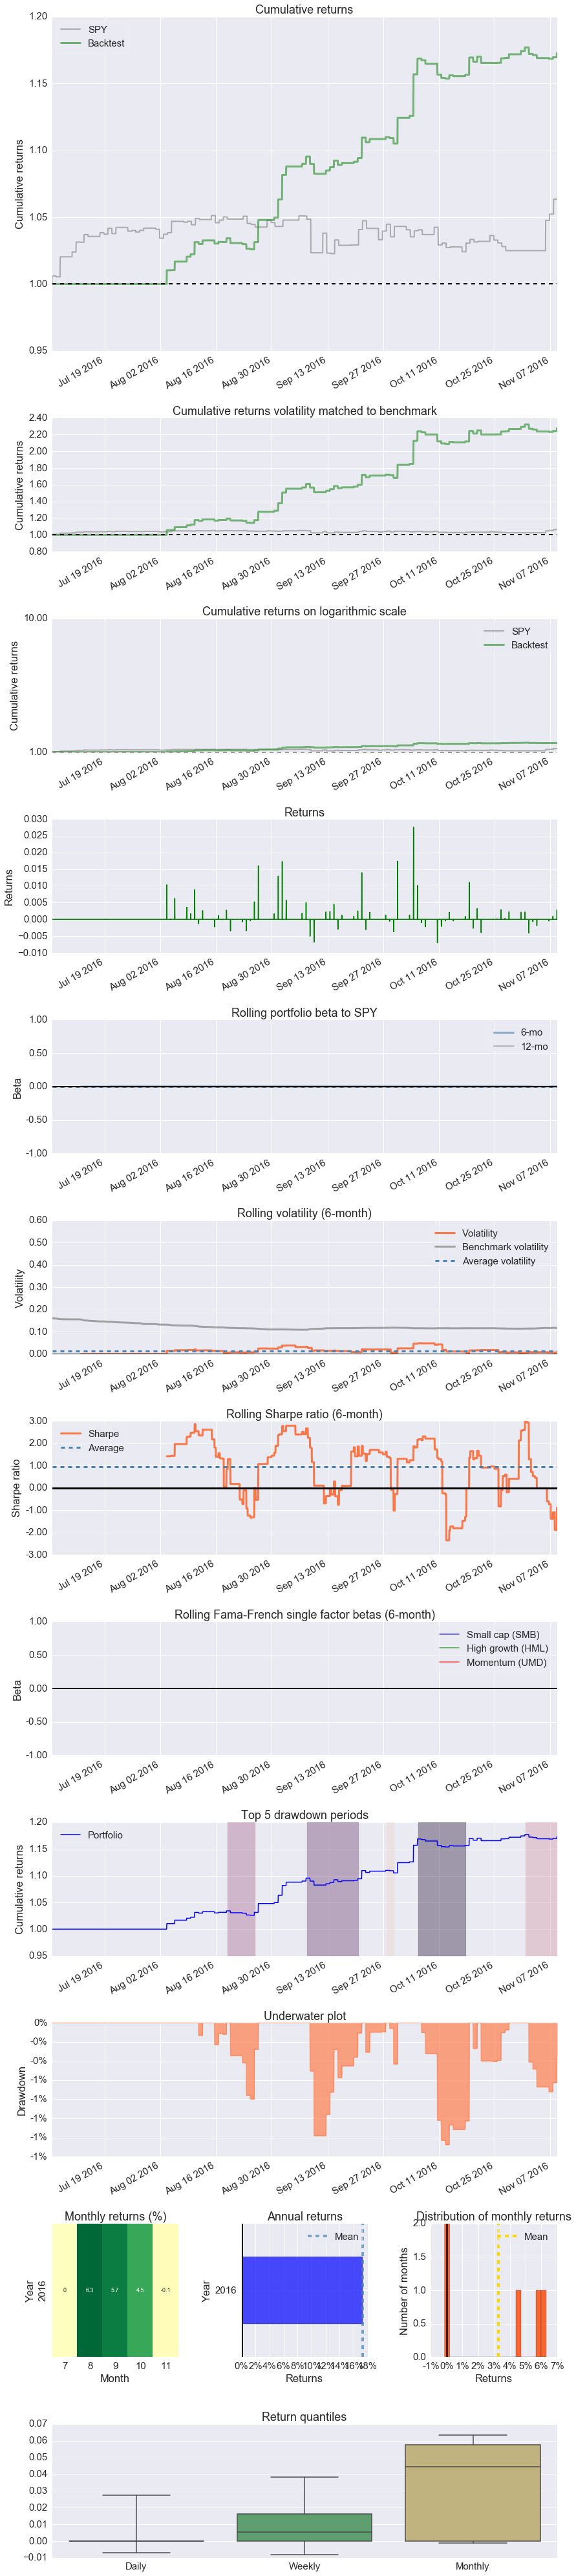

In [12]:
import tradeframework.utils.trader as trader
tInfo = env.getTradingInfo(context, dInfo, 10000)
trader.displaySummary(dInfo.assets[0], tInfo, baseline)

In [162]:
import numpy as np 
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    result = result[result.size//2:]
    result = result / max(result)
    return result

In [164]:
a = dRet
#a -= np.mean(a)
a = autocorr(a)
a

array([ 1.00000000e+00,  9.85189481e-02,  8.22305090e-02, ...,
        7.82185138e-04, -2.52691981e-04,  1.03447241e-04])

In [161]:
#dRet = dInfo.returns.Close + 1
dRet = trader.getPeriodReturns(dInfo.returns) + 1
#dRet = x.resample('B').agg('prod')
pnl = np.cumprod(dRet)

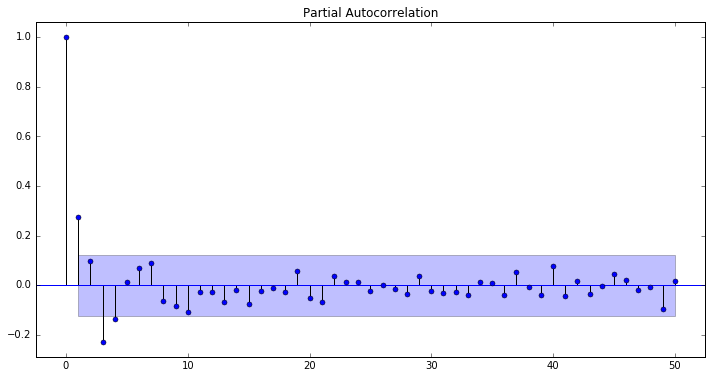

In [157]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_pacf(dRet-1, lags=50)
pyplot.show()

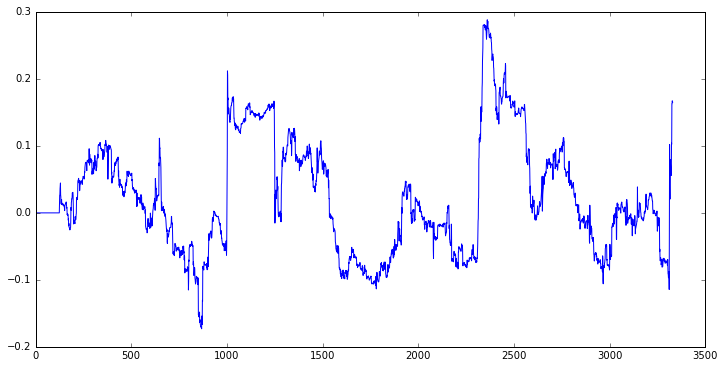

In [186]:
#pyplot.plot(ac_win(dRet))
pyplot.plot(ac_win(dRet, lag=2))
pyplot.show()

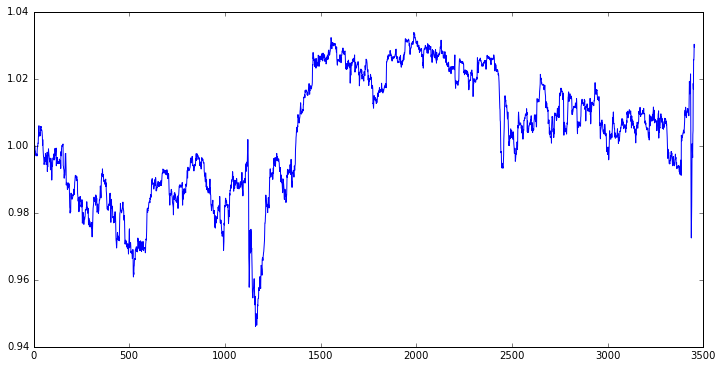

In [179]:
pyplot.plot(pnl.values)
pyplot.show()

In [184]:
def ac_win(dRet, window=250, lag=1):
    ac = [0] * (window//2)
    for i in range(window, len(dRet)):
        sample = dRet[i-window:i]
        ac.append(autocorr(sample)[lag])
    return ac

3206